In [1]:
!nvidia-smi

Tue Jun 28 07:28:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Lấy dữ liệu

In [28]:
!gdown https://drive.google.com/uc?id=1LxoEvYkaYrPIfaFRzQXcfNYDBmrCicg3
!gdown https://drive.google.com/uc?id=1_qmqKEw6k8eD59APKJBiJnLm79PiMpNC
!gdown https://drive.google.com/uc?id=1fSvo1SJnP5wZp3AGiiblnG8XunbqiunY
!gdown https://drive.google.com/uc?id=1-rMx7zbIOuWyCQDquC1xfzVXWafmWkXE
!gdown https://drive.google.com/uc?id=1TC-7BAQpfRCGhC5kUAA7lnOo-LXqpAKI
!gdown https://drive.google.com/uc?id=1QA2kq33CDtZSOv8MIW-_uDzzyNTAD1PP

Downloading...
From: https://drive.google.com/uc?id=1LxoEvYkaYrPIfaFRzQXcfNYDBmrCicg3
To: /content/train.rar
100% 189k/189k [00:00<00:00, 114MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_qmqKEw6k8eD59APKJBiJnLm79PiMpNC
To: /content/test.rar
100% 57.5k/57.5k [00:00<00:00, 61.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fSvo1SJnP5wZp3AGiiblnG8XunbqiunY
To: /content/dev.rar
100% 29.2k/29.2k [00:00<00:00, 44.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-rMx7zbIOuWyCQDquC1xfzVXWafmWkXE
To: /content/VnCoreNLP-1.1.1.jar
100% 27.4M/27.4M [00:00<00:00, 221MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TC-7BAQpfRCGhC5kUAA7lnOo-LXqpAKI
To: /content/models-20220212T185004Z-001.zip
100% 227k/227k [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QA2kq33CDtZSOv8MIW-_uDzzyNTAD1PP
To: /content/data.rar
100% 13.6k/13.6k [00:00<00:00, 23.8MB/s]


In [3]:
!unzip /content/models-20220212T185004Z-001.zip
!unrar x train.rar
!unrar x dev.rar
!unrar x test.rar
!unrar x data.rar

Archive:  /content/models-20220212T185004Z-001.zip
  inflating: models/wordsegmenter/wordsegmenter.rdr  
  inflating: models/wordsegmenter/vi-vocab  

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from train.rar

Creating    train                                                     OK
Extracting  train/sentiments.txt                                           1%  OK 
Extracting  train/sents.txt                                               19% 36% 53% 71% 88% 98%  OK 
Extracting  train/topics.txt                                              99%  OK 
All OK

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from dev.rar

Creating    dev                                                       OK
Extracting  dev/sentiments.txt                                             1%  OK 
Extracting  dev/sents.txt                                                 97%  OK 
Extract

In [4]:
!gdown https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv
!mv sentiments.txt train/
!gdown https://drive.google.com/uc?id=1vkQS5gI0is4ACU58-AbWusnemw7KZNfO
!mv sentiments.txt test/
!gdown https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL
!mv sentiments.txt dev/
!gdown https://drive.google.com/uc?id=1DwLgDEaFWQe8mOd7EpF-xqMEbDLfdT-W
!mv topics.txt dev/

Downloading...
From: https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv
To: /content/sentiments.txt
100% 22.9k/22.9k [00:00<00:00, 38.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vkQS5gI0is4ACU58-AbWusnemw7KZNfO
To: /content/sentiments.txt
100% 6.33k/6.33k [00:00<00:00, 11.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL
To: /content/sentiments.txt
100% 3.17k/3.17k [00:00<00:00, 6.24MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DwLgDEaFWQe8mOd7EpF-xqMEbDLfdT-W
To: /content/topics.txt
100% 3.17k/3.17k [00:00<00:00, 6.31MB/s]


In [5]:
!rm -r *.rar *.txt *.zip

rm: cannot remove '*.txt': No such file or directory


## Đọc dữ liệu

In [6]:
#@title Library
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os 
import matplotlib.pyplot as plt
import json
import re
from sklearn.model_selection import train_test_split

In [7]:
TRAIN_PATH = "train"
DEV_PATH = "dev"
TEST_PATH = "test"
DATA_ADDED = "data"

In [8]:
data = np.genfromtxt(os.path.join(DATA_ADDED , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(DATA_ADDED , 'sentiments.txt'), delimiter='\n', dtype=int)
# topics = np.genfromtxt(os.path.join(DEV_PATH , 'topics.txt'), delimiter='\n', dtype=int)
added = pd.DataFrame({"text":data,"sentiment":label})
added.to_csv("added_data.csv")

In [9]:
data = np.genfromtxt(os.path.join(DEV_PATH , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(DEV_PATH , 'sentiments.txt'), delimiter='\n', dtype=int)
topics = np.genfromtxt(os.path.join(DEV_PATH , 'topics.txt'), delimiter='\n', dtype=int)
dev = pd.DataFrame({"text":data,"sentiment":label,"topic":topics})
dev.to_csv("dev.csv")

In [10]:
data = np.genfromtxt(os.path.join(TRAIN_PATH , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(TRAIN_PATH , 'sentiments.txt'), delimiter='\n', dtype=int)
topics = np.genfromtxt(os.path.join(TRAIN_PATH , 'topics.txt'), delimiter='\n', dtype=int)
train = pd.DataFrame({"text":data,"sentiment":label,"topic":topics})
train_original = pd.concat([train , dev], axis = 0 )
train = pd.concat([train , dev, added], axis = 0 )
train_original.to_csv("train_original.csv")
train.to_csv("train.csv")

In [11]:
data = np.genfromtxt(os.path.join(TEST_PATH , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(TEST_PATH , 'sentiments.txt'), delimiter='\n', dtype=int)
topics = np.genfromtxt(os.path.join(TEST_PATH , 'topics.txt'), delimiter='\n', dtype=int)
test = pd.DataFrame({"text":data,"sentiment":label,"topic":topics})
test.to_csv("test.csv")

In [12]:
#@title Install library
!pip install -q -U watermark
!pip install -qq transformers
!pip install -qq sentencepiece
!pip install -qq vncorenlp
!pip install -qq fastBPE
!pip install -qq fairseq
!pip install -qq ray[tune]

     |████████████████████████████████| 4.4 MB 4.1 MB/s 
     |████████████████████████████████| 596 kB 77.0 MB/s 
     |████████████████████████████████| 6.6 MB 65.7 MB/s 
     |████████████████████████████████| 101 kB 13.1 MB/s 
     |████████████████████████████████| 1.2 MB 4.0 MB/s 
     |████████████████████████████████| 2.6 MB 4.1 MB/s 
     |████████████████████████████████| 11.0 MB 4.3 MB/s 
     |████████████████████████████████| 123 kB 70.8 MB/s 
     |████████████████████████████████| 236 kB 90.4 MB/s 
     |████████████████████████████████| 92 kB 11.1 MB/s 
     |████████████████████████████████| 112 kB 59.4 MB/s 
     |████████████████████████████████| 54.5 MB 1.4 MB/s 
     |████████████████████████████████| 10.1 MB 82.3 MB/s 
     |████████████████████████████████| 4.1 MB 61.7 MB/s 
     |████████████████████████████████| 144 kB 82.1 MB/s 
     |████████████████████████████████| 125 kB 97.8 MB/s 
     |████████████████████████████████| 461 kB 71.4 MB/s 


In [13]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

numpy       : 1.21.6
pandas      : 1.3.5
torch       : 1.11.0+cu113
transformers: 4.20.1



In [14]:
import torch
from transformers import AutoModel, AutoTokenizer

phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

# INPUT TEXT MUST BE ALREADY WORD-SEGMENTED!
line = "Tôi là sinh_viên trường đại_học Công_nghệ ."

input_ids = torch.tensor([tokenizer.encode(line)])

with torch.no_grad():
    features = phobert(input_ids)

Downloading:   0%|          | 0.00/557 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/518M [00:00<?, ?B/s]

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/874k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [15]:
tokenizer.encode_plus(
            line,
            max_length=32,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

{'input_ids': tensor([[   0,  218,    8,  649,  212,  956, 2413,    5,    2,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])}

In [16]:
input_ids

tensor([[   0,  218,    8,  649,  212,  956, 2413,    5,    2]])

## EDA

In [17]:
train = pd.read_csv("train.csv",index_col = 0)
dev = pd.read_csv("dev.csv",index_col = 0)
test = pd.read_csv("test.csv",index_col = 0)
added = pd.read_csv("added_data.csv",index_col = 0)
train_original = pd.read_csv("train_original.csv",index_col = 0)
print("Train original: ",train_original.shape)
print("Train shape: ",train.shape)
print("Dev shape: ", dev.shape)
print("Test shape: ", test.shape)
print("Data Added shape: ", added.shape)

Train original:  (13009, 3)
Train shape:  (14066, 3)
Dev shape:  (1583, 3)
Test shape:  (3166, 3)
Data Added shape:  (1057, 2)


In [18]:
(dev.shape[0]/train.shape[0])*100

11.254087871463103

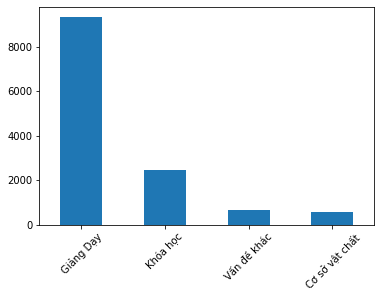

In [19]:
train.topic.map({0: "Giảng Dạy", 1: "Khóa học", 2: "Cơ sở vật chất", 3: "Vấn đề khác"}).value_counts().plot.bar(rot=45)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14066 entries, 0 to 1056
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       14066 non-null  object 
 1   sentiment  14066 non-null  int64  
 2   topic      13009 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 439.6+ KB


* Dữ liệu nhãn các topic mất cân bằng nghiêm trọng
* 0: "Về Giảng Viên", "1": "Về chương trình giảng dạy", 2: "Về cơ sở vật chất", "3": "Và những chủ đề khác".

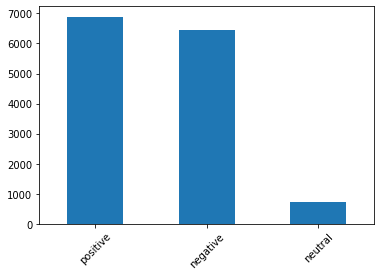

In [21]:
train.sentiment.map({0:"negative",1: "neutral",2 : "positive"}).value_counts().plot.bar(rot = 45);

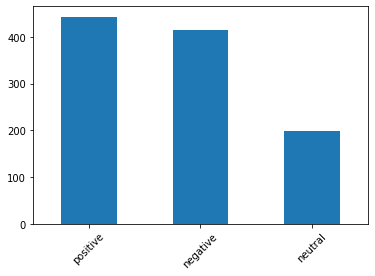

In [22]:
added.sentiment.map({0:"negative",1: "neutral",2 : "positive"}).value_counts().plot.bar(rot = 45);

+ Dữ liệu tập trung nhiều ở 2 lớp quan trọng là positive và negative

In [23]:
train.text.apply(lambda x: len(x.split())).describe()

count    14066.000000
mean        13.867695
std          9.876704
min          2.000000
25%          8.000000
50%         11.000000
75%         17.000000
max        161.000000
Name: text, dtype: float64

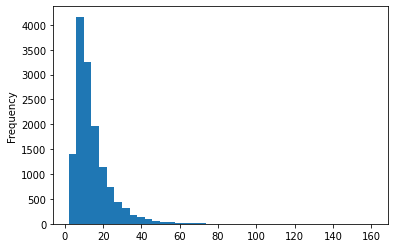

In [24]:
train.text.apply(lambda x: len(x.split())).plot.hist(bins = 40);

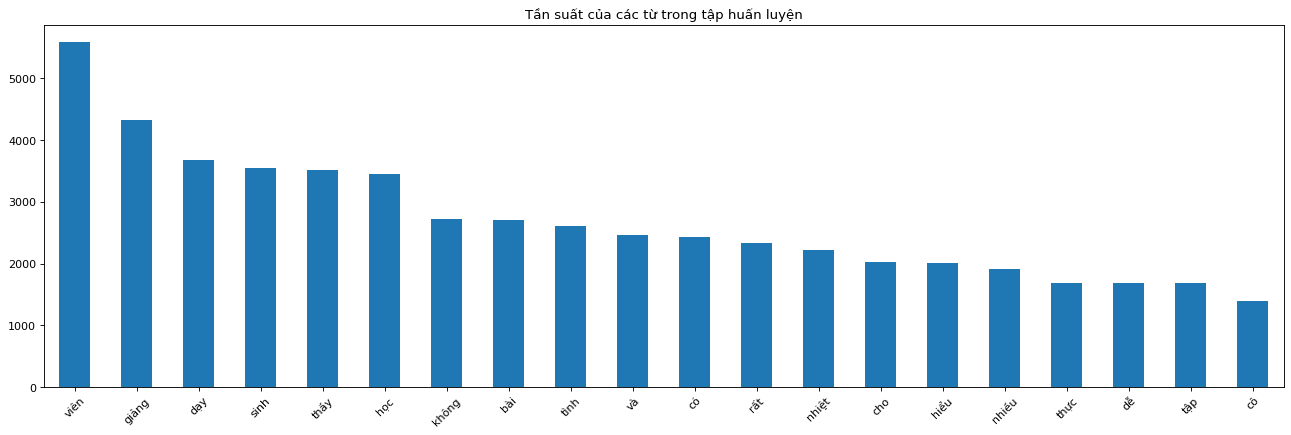

In [25]:
plt.figure(figsize = (20, 6), dpi = 80)
train['text'].str.replace(".","").str.replace(",","").str.split().explode().value_counts().nlargest(20).plot.bar(rot = 45)
plt.title("Tần suất của các từ trong tập huấn luyện");

* max_sequence_lenght = 32

## PhoBert

In [26]:
import torch
from torch.utils.data import Dataset
from transformers import AutoTokenizer
from sklearn.metrics import classification_report,confusion_matrix

import argparse
import os
import logging
from sklearn.metrics import f1_score , precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from vncorenlp import VnCoreNLP
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from ray import tune
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
tqdm.pandas()

def read_object(args, **kwargs):
    df = pd.read_csv(args.input_path,index_col = 0)
    if args.type_training == "sentiment":
      print("Training sentiment")
      df.rename(columns = {"sentiment":"label"} , inplace = True)
    if args.type_training == "topic":
      print("Training topic")
      df.rename(columns = {"topic":"label"} , inplace = True)
      df = df.dropna(axis = 0)
    return df


def write_object(df, save_path):
    df.to_csv(save_path)


class BertDataset(Dataset):
    """Inherits from torch.utils.data.Dataset.
    Arguments:
        data (pd.DataFrame): Contains columns 'input' and 'label'.
        model_name (str): Name of the transformers model to load the tokenizer.
        max_sequence_length (int): Maximum length of the sequence.
    """
    def __init__(self, data, model_name, max_sequence_length):
        self.data = data
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.max_sequence_length = max_sequence_length

    def __getitem__(self, index):
        """Returns the model inputs at the specified index."""
        text_input = self.data["text"].iloc[index]
        input_dict = self.tokenizer.encode_plus(
            text_input,
            max_length=self.max_sequence_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        inputs = {
            "input_ids": input_dict["input_ids"][0],
            "attention_mask": input_dict["attention_mask"][0],
        }
        if 'label' in self.data.columns: # in case, the predicted data have no this column
            inputs["labels"] = torch.tensor(self.data["label"].iloc[index], dtype=torch.long)
        return inputs

    def __len__(self):
        """Returns the length of the dataset."""
        return len(self.data)

In [29]:
import argparse
import os
import logging
from sklearn.metrics import f1_score , precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from vncorenlp import VnCoreNLP
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from ray import tune
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
tqdm.pandas()

# from utils import read_object, BertDataset

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')        

def preprocess_data(df, train_size=0.8):
    """Pre-process data for training."""
    # VnCoreNLP tokenize
    with VnCoreNLP("VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') as rdrsegmenter:
        df["text"] = df["text"].apply(str).progress_apply(lambda x: ' '.join([' '.join(sent) for sent in rdrsegmenter.tokenize(x)]))
    # Split data into train and valid
    traindf, validdf = train_test_split(df[["text", "label"]], train_size=train_size,random_state = 14)
    print("Training shape: ",traindf.shape)
    print("Validate shape: ",validdf.shape)
    return traindf, validdf


# def compute_metrics(eval_preds):
#     """Compute custom metrics to track in logging."""
#     y_true = eval_preds.label_ids
#     y_pred = eval_preds.predictions.argmax(-1)
#     f1 = f1_score(y_true, y_pred, average='micro')
#     return {
#         "f1": f1
#     }

def compute_metrics(eval_preds):
    """Compute custom metrics to track in logging."""
    y_true = eval_preds.label_ids
    y_pred = eval_preds.predictions.argmax(-1)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred,average= "macro")
    recall = recall_score(y_true, y_pred,average= "macro")
    accuracy = accuracy_score(y_true, y_pred)
    return {
        "acc": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }


def find_best_hyperparameters(model_name, num_labels, train_dataset, valid_dataset, n_trials=20):
    def model_init():
        return AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, torchscript=True)
    training_args = TrainingArguments(
        output_dir="out",
        # num_train_epochs=5,
        # learning_rate=1e-5,
        # per_device_train_batch_size=8,
        # per_device_eval_batch_size=8,
        evaluation_strategy="epoch", # steps
        # logging_dir="logs",
        # logging_steps=10,
        # logging_strategy="steps",
        save_strategy="no", # don't need to save while searching hyperparameters
        load_best_model_at_end=False)
    trainer = Trainer(
        model_init=model_init,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=valid_dataset,
        compute_metrics=compute_metrics
    )
    # important metrics in Bert
    # https://medium.com/distributed-computing-with-ray/hyperparameter-optimization-for-transformers-a-guide-c4e32c6c989b
    tune_config = {
        "learning_rate": tune.loguniform(1e-5, 5e-5),
        "weight_decay": tune.uniform(0, 0.3),
        "per_device_train_batch_size": tune.choice([8, 16]),
        "num_train_epochs": tune.choice(list(range(3, 9))),
        # "seed": tune.uniform(1, 40),
    }
    best_run = trainer.hyperparameter_search(
        hp_space=lambda _: tune_config,
        direction="maximize", 
        backend="ray",
        n_trials=n_trials,
    )
    return best_run  


def train_with_best_hyperparameters(model_name, num_labels, hyperparameters, train_dataset, valid_dataset):
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, torchscript=True)
    training_args = TrainingArguments(
        output_dir="out",
        learning_rate=hyperparameters["learning_rate"],
        weight_decay=hyperparameters["weight_decay"],
        per_device_train_batch_size=hyperparameters["per_device_train_batch_size"],
        num_train_epochs=hyperparameters["num_train_epochs"],
        per_device_eval_batch_size=8,
        evaluation_strategy="epoch",
        # logging_dir="logs",
        # logging_steps=10,
        logging_strategy="epoch",
        metric_for_best_model='f1',
        save_strategy="epoch",
        save_total_limit=1,
        load_best_model_at_end=True)
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=valid_dataset,
        compute_metrics=compute_metrics
    )
    trainer.train()
    metrics = trainer.evaluate()
    return model, metrics


def save_model(dummy_row, model, model_dir):
    dummy_input = (
        dummy_row["input_ids"].unsqueeze(0).to(device),
        dummy_row["attention_mask"].unsqueeze(0).to(device)
    )
    traced_model = torch.jit.trace(model, dummy_input)
    if not os.path.exists(model_dir):
      os.mkdir(model_dir)
    torch.jit.save(traced_model, os.path.join(model_dir, "model.pt"))


def train(args):
    # Load training dataset
    df = read_object(args).sample(frac=1.)
    if args.max_data_rows:
        df = df.iloc[:args.max_data_rows].copy()
    print(f"Data contains {len(df)} rows")
    # Preprocess and featurize data
    traindf, validdf = preprocess_data(df, args.train_size)

    # Create dataset for model input
    train_dataset = BertDataset(traindf, args.model_name, args.max_sequence_length)
    valid_dataset = BertDataset(validdf, args.model_name, args.max_sequence_length)
    print(train_dataset[0])
    # Find the best hyperparameters
    best_run = find_best_hyperparameters(args.model_name, args.num_labels, train_dataset, valid_dataset, args.n_trials)
    print(best_run)
    best_hyperparameters = best_run[2]
    # Train again with the best hyperparameters, ex. BestRun(run_id='54dcf_00001', objective=0.68, hyperparameters={'learning_rate': 3.248192869770297e-05, 'weight_decay': 0.17959754525911098})
    model, metrics = train_with_best_hyperparameters(args.model_name, args.num_labels, best_hyperparameters, train_dataset, valid_dataset)
    # Save model
    save_model(train_dataset[0], model, args.model_dir)
    # Save metrics & hyperparameters
    with open(os.path.join(args.output_data_dir, "metrics.json"), "w") as f:
        json.dump({**metrics, **best_hyperparameters}, f)
    print('Finished Training')

def training(args):

    df = read_object(args).sample(frac=1.)
    if args.max_data_rows:
        df = df.iloc[:args.max_data_rows].copy()
    print(f"Data contains {len(df)} rows")
    # Preprocess and featurize data
    traindf, validdf = preprocess_data(df, args.train_size)
    # Create dataset for model input
    train_dataset = BertDataset(traindf, args.model_name, args.max_sequence_length)
    valid_dataset = BertDataset(validdf, args.model_name, args.max_sequence_length)
    # Find the best hyperparameters
    # hyperparameters = {
    #     "learning_rate": args.learning_rate,
    #     "weight_decay" : args.weight_decay,
    #     "per_device_train_batch_size" : args.train_batch_size,
    #     "num_train_epochs" : args.epochs
    # }
    
    hyperparameters = {
        "learning_rate": 1.8272261776066238e-05,
        "weight_decay" : 0.2852142919229748,
        "per_device_train_batch_size" : 8,
        "num_train_epochs" : 7
    }

    # Train again with the best hyperparameters, ex. BestRun(run_id='54dcf_00001', objective=0.68, hyperparameters={'learning_rate': 3.248192869770297e-05, 'weight_decay': 0.17959754525911098})
    model, metrics = train_with_best_hyperparameters(args.model_name, args.num_labels, hyperparameters, train_dataset, valid_dataset)
    # Save model
    save_model(train_dataset[0], model, args.model_dir)
    # Save metrics & hyperparameters
    with open(os.path.join(args.output_data_dir, "metrics.json"), "w") as f:
        json.dump({**metrics, **hyperparameters}, f)
    print('Finished Training')


if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    # Hyperparameters from launch_training_job.py get passed in as command line args.
    parser.add_argument('--input_path', type=str, default = "train_original.csv")
    parser.add_argument('--dev_path', type=str, default = "dev.csv")
    parser.add_argument('--num_labels', type=int, default=3)
    parser.add_argument('--train_size', type=float, default=.8)
    parser.add_argument('--adam_epsilon', type=float, default=1e-8)
    parser.add_argument('--epochs', type=int, default=6)
    parser.add_argument('--type_training', type=str, default="sentiment")
    parser.add_argument('--learning_rate', type=float, default=5e-5)
    parser.add_argument('--weight_decay', type=float, default=0.0)
    parser.add_argument('--max_data_rows', type=int, default=None)
    parser.add_argument('--max_sequence_length', type=int, default=32)
    parser.add_argument('--model_name', type=str, default='vinai/phobert-base') # vinai/phobert-base / bert-base-uncased
    parser.add_argument('--train_batch_size', type=int, default=16)
    parser.add_argument('--valid_batch_size', type=int, default=16)
    parser.add_argument('--n_trials', type=int, default=6)
    parser.add_argument('--model_dir', type=str, default="model") # output_path arg from train_deploy.py.
    parser.add_argument('--output_data_dir', type=str, default="") # 
    # # sua ten type_training, num_labels ,input_path 
    # train(parser.parse_args("")) # co turning
    training(parser.parse_args("")) # khong turning

Training sentiment
Data contains 13009 rows


100%|██████████| 13009/13009 [00:30<00:00, 420.59it/s]


Training shape:  (10407, 2)
Validate shape:  (2602, 2)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initial

Epoch,Training Loss,Validation Loss,Acc,F1,Precision,Recall
1,0.283700,0.274384,0.936972,0.816618,0.855275,0.792432
2,0.185900,0.264692,0.936972,0.832611,0.849343,0.819042
3,0.134200,0.284926,0.940815,0.799375,0.857337,0.770671
4,0.099400,0.312246,0.942736,0.837080,0.850792,0.825578
5,0.073300,0.353700,0.942352,0.828458,0.867602,0.803385
6,0.050400,0.371818,0.941968,0.832685,0.847982,0.820144
7,0.037100,0.367718,0.943505,0.833277,0.851500,0.818917


***** Running Evaluation *****
  Num examples = 2602
  Batch size = 8
Saving model checkpoint to out/checkpoint-1301
Configuration saved in out/checkpoint-1301/config.json
Model weights saved in out/checkpoint-1301/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 2602
  Batch size = 8
Saving model checkpoint to out/checkpoint-2602
Configuration saved in out/checkpoint-2602/config.json
Model weights saved in out/checkpoint-2602/pytorch_model.bin
Deleting older checkpoint [out/checkpoint-1301] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 2602
  Batch size = 8
Saving model checkpoint to out/checkpoint-3903
Configuration saved in out/checkpoint-3903/config.json
Model weights saved in out/checkpoint-3903/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 2602
  Batch size = 8
Saving model checkpoint to out/checkpoint-5204
Configuration saved in out/checkpoint-5204/config.json
Model weights saved in out/checkpoint-5204/pytorch_m

Finished Training


## Plot results

In [30]:
with open('out/checkpoint-9107/trainer_state.json', 'r') as f:
  data = json.load(f)

df_results = pd.DataFrame()
# df_results = pd.DataFrame(columns = ["Epoch","training_loss","validation_loss","f1","precision","recall"])
for dict_rs in data["log_history"]:
  if len(dict_rs) > 6:
    df_results = df_results.append(dict_rs, ignore_index=True)

In [31]:
df_results.head()

,epoch,eval_acc,eval_f1,eval_loss,eval_precision,eval_recall,eval_runtime,eval_samples_per_second,eval_steps_per_second,step
0,1.0,0.936972,0.816618,0.274384,0.855275,0.792432,5.8613,443.932,55.619,1301.0
1,2.0,0.936972,0.832611,0.264692,0.849343,0.819042,5.8312,446.219,55.906,2602.0
2,3.0,0.940815,0.799375,0.284926,0.857337,0.770671,5.8297,446.336,55.921,3903.0
3,4.0,0.942736,0.837080,0.312246,0.850792,0.825578,5.8611,443.947,55.621,5204.0
4,5.0,0.942352,0.828458,0.353700,0.867602,0.803385,5.8522,444.621,55.706,6505.0


## Inferences

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

def model_fn(model_dir, model_name = "model.pt"):
    print("model_fn_sentiment")
    return torch.jit.load(os.path.join(model_dir, model_name), map_location=device)

def infer(model, tokenizer,  input_text, model_name = "vinai/phobert-base"):
  with VnCoreNLP("VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') as rdrsegmenter:
    input_text = ' '.join([' '.join(sent) for sent in rdrsegmenter.tokenize(input_text)])
  max_sequence_length = 256
  input_dict = tokenizer.encode_plus(
            input_text,
            max_length=max_sequence_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
  inputs = {
      "input_ids": torch.tensor(input_dict["input_ids"]).to(device),
      "attention_mask": torch.tensor(input_dict["attention_mask"]).to(device),
  }
  model.to(device)
  model.eval()
  with torch.no_grad():
    predictions, *_ = model(**inputs)
    predictions = torch.argmax(predictions, dim=1).flatten()
    predictions = predictions.detach().cpu().numpy()
  
  label_map = ["Negative","Neutral","Positive"]
  print(label_map[predictions[0]])
  return predictions

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file https://huggingface.co/vinai/phobert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
Model config RobertaConfig {
  "_name_or_path": "vinai/phobert-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 258,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "tokenizer_class": "Ph

In [33]:
model_dir = "model"
model = model_fn(model_dir)

model_fn_sentiment


In [34]:
input_text = "Lớp học chán quá"
infer(model, tokenizer, input_text)

Negative


array([0])

## Evaluate

### Sentiment

BestRun(run_id='af9d2_00005', objective=3.541830492707837, hyperparameters={'learning_rate': 1.8272261776066238e-05, 'weight_decay': 0.2852142919229748, 'per_device_train_batch_size': 8, 'num_train_epochs': 7})

Data contains 3166 rows


100%|██████████| 3166/3166 [00:08<00:00, 367.72it/s]
Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file https://huggingface.co/vinai/phobert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
Model config RobertaConfig {
  "_name_or_path": "vinai/phobert-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 258,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_

              precision    recall  f1-score   support

    negative       0.95      0.97      0.96      1409
     neutral       0.72      0.52      0.61       167
    positive       0.96      0.96      0.96      1590

    accuracy                           0.94      3166
   macro avg       0.88      0.82      0.84      3166
weighted avg       0.94      0.94      0.94      3166



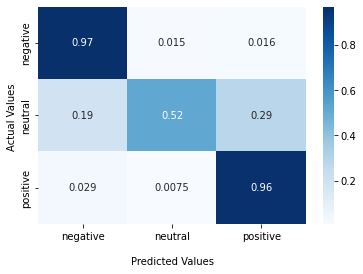

In [35]:
import seaborn as sns
def show_confusion_matrix(confusion_matrix):

  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# chon mot checkpoint in folder out để làm model_dir
def evaluate_test(model_name = "vinai/phobert-base", path_test = "test.csv", model_dir = "out/checkpoint-1141"):
    data = data = pd.read_csv(path_test, index_col = 0)
    df = data[["text"]]
    print(f"Data contains {len(df)} rows")
    
    with VnCoreNLP("VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') as rdrsegmenter:
        df["text"] = df["text"].apply(str).progress_apply(lambda x: ' '.join([' '.join(sent) for sent in rdrsegmenter.tokenize(x)]))

    test_dataset = BertDataset(df, model_name, 32)
    # model = model_fn(model_dir)
    model = AutoModelForSequenceClassification.from_pretrained(model_dir)
    trainer = Trainer(model=model)
    
    class_names = ["negative","neutral","positive"]
    predictions, *_ = trainer.predict(test_dataset)
    predictions = predictions.argmax(-1)

    print(classification_report(data["sentiment"].values, predictions, target_names=class_names))
    # input_data["accuracy"] = softmax(predictions, axis=1).max(-1)*100
    cm = confusion_matrix(data["sentiment"].values, predictions ,normalize="true")
    
    ax = sns.heatmap(cm, annot=True, cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)


evaluate_test(model_dir = "out/checkpoint-9107")